In [16]:
import numpy as np
import matplotlib.pyplot as plt

name_str='uniform-distribution-frequency-65-seed-{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.01,0.4,0.1)
axis_std_w1 = np.arange(0.001, 0.4, 0.06)
axis_std_w2 = np.arange(0.001, 0.4, 0.06)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,7,7))
test_accuracy_10_samples = np.zeros((10,7,7))


In [17]:
test1 = np.load('uniform-distribution-frequency-65-seed-1.npz')
print(test1['loss_hist'])

[4.7059086  1.98154189 1.83745025 1.65478022 1.46164617]


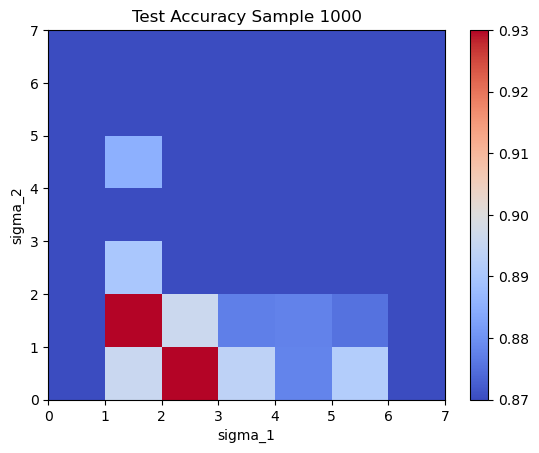

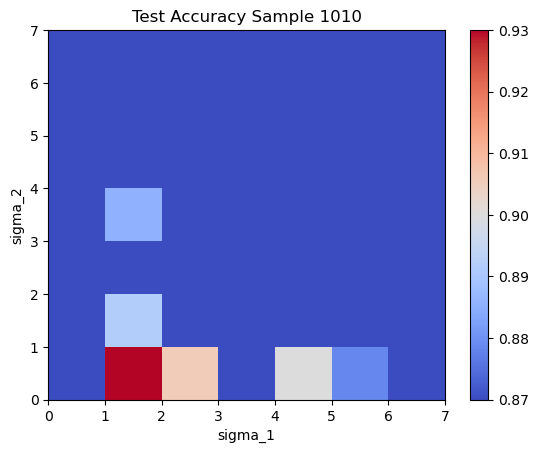

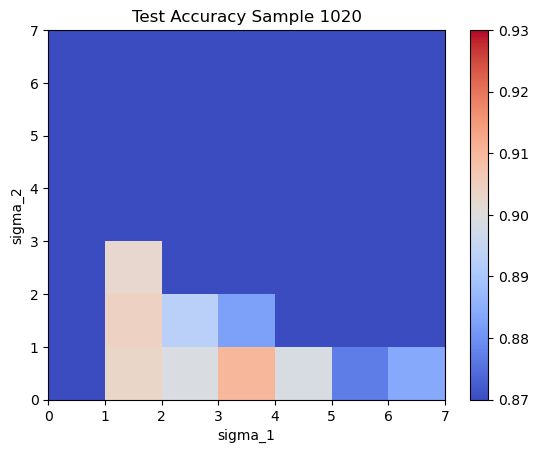

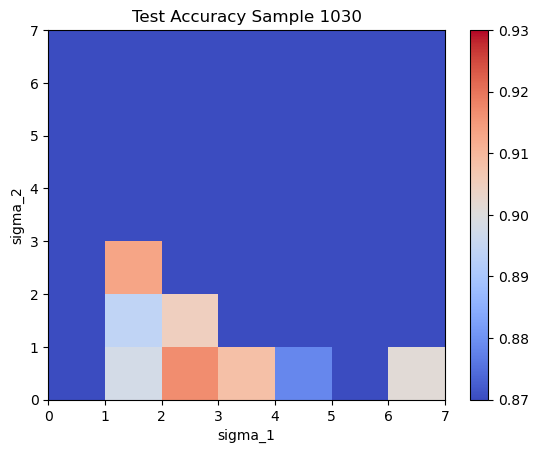

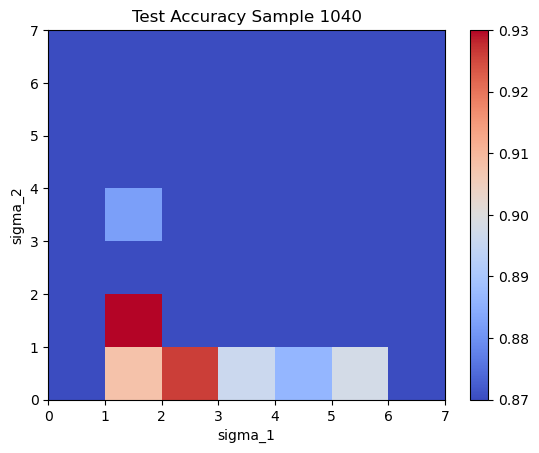

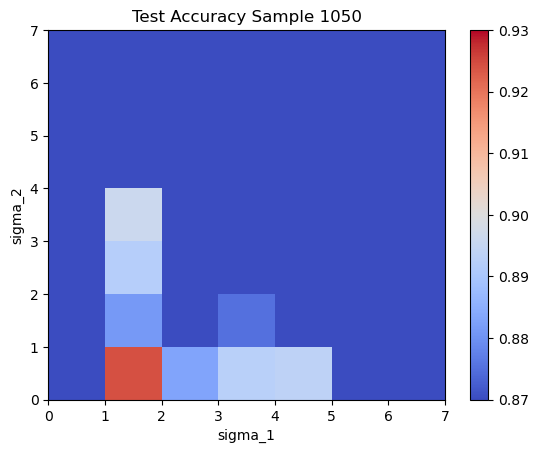

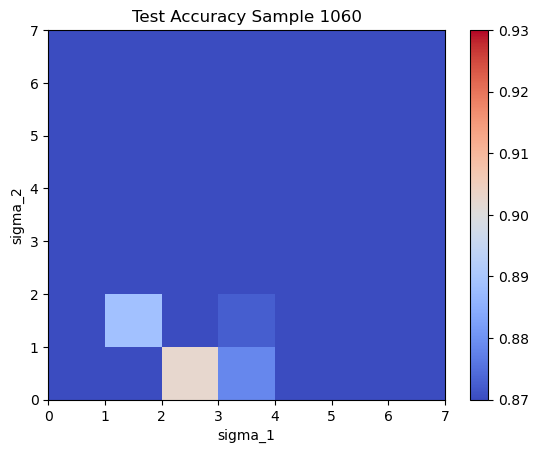

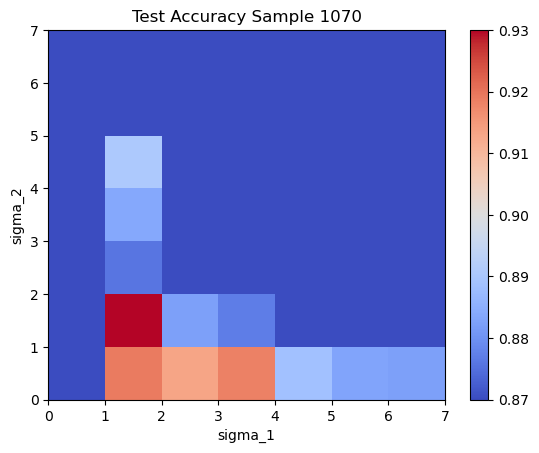

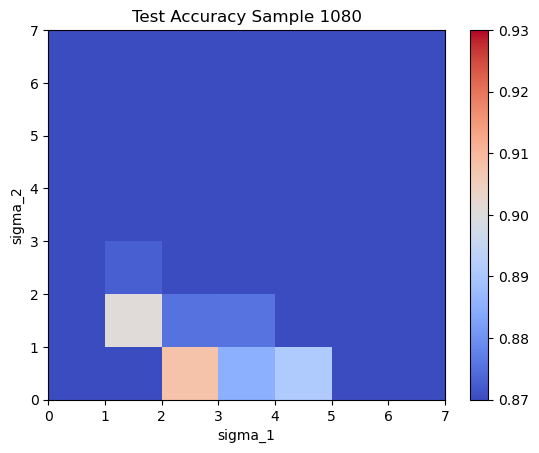

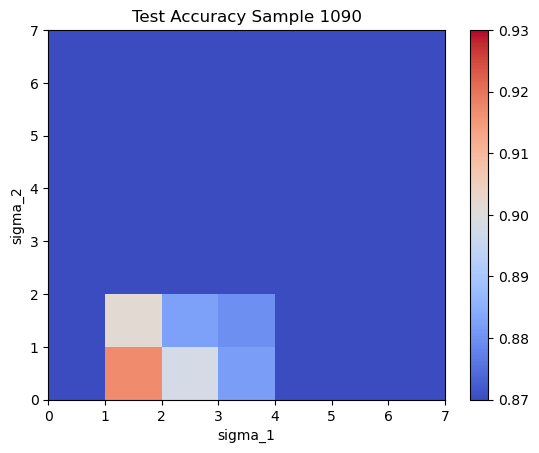

In [18]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes()
    b = ax.pcolormesh(data['test_accuracy_w1_w2'].T, cmap ='coolwarm', vmin=0.87, vmax=0.93)
    plt.colorbar(b)
    ax.set_xlabel('sigma_1')
    ax.set_ylabel('sigma_2')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]


In [19]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
std_dev_train_accuracy_grid_10_by_10_10_samples = np.std(train_accuracy_10_samples, axis=0)

In [20]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [21]:
average_test_accuracy_grid_10_by_10_10_samples

array([[0.07421875, 0.07421875, 0.07421875, 0.07421875, 0.07421875,
        0.07421875, 0.07421875],
       [0.89423077, 0.90561899, 0.8804387 , 0.86903045, 0.84399038,
        0.82048277, 0.79483173],
       [0.90828325, 0.87700321, 0.8435597 , 0.80984575, 0.78172075,
        0.74434095, 0.73483574],
       [0.88334335, 0.87005208, 0.81408253, 0.77278646, 0.73737981,
        0.71553486, 0.69885817],
       [0.87244591, 0.84782652, 0.79396034, 0.75824319, 0.72432893,
        0.67674279, 0.63055889],
       [0.86056691, 0.84128606, 0.7984976 , 0.75043069, 0.69546274,
        0.63465545, 0.57439904],
       [0.83364383, 0.83658854, 0.79217748, 0.72579127, 0.6671274 ,
        0.59701522, 0.53941306]])

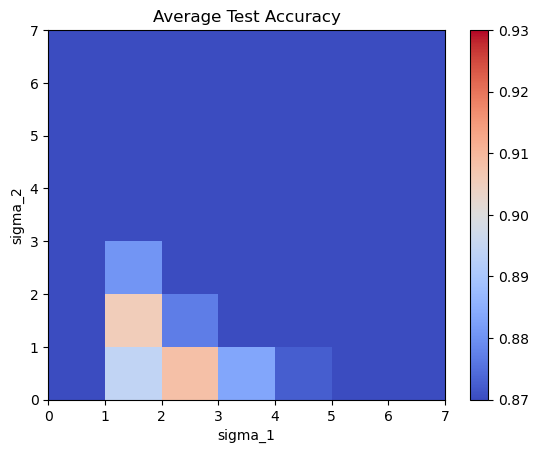

In [22]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(average_test_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', vmin= 0.87, vmax=0.93)
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_test_accuracy_grid_200.png".format(sample))

In [23]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_train_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_train_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_train_accuracy_grid_10_by_10_10_samples.shape)

In [24]:
average_test_accuracy_grid_10_by_10_10_samples

array([[0.07421875, 0.07421875, 0.07421875, 0.07421875, 0.07421875,
        0.07421875, 0.07421875],
       [0.89423077, 0.90561899, 0.8804387 , 0.86903045, 0.84399038,
        0.82048277, 0.79483173],
       [0.90828325, 0.87700321, 0.8435597 , 0.80984575, 0.78172075,
        0.74434095, 0.73483574],
       [0.88334335, 0.87005208, 0.81408253, 0.77278646, 0.73737981,
        0.71553486, 0.69885817],
       [0.87244591, 0.84782652, 0.79396034, 0.75824319, 0.72432893,
        0.67674279, 0.63055889],
       [0.86056691, 0.84128606, 0.7984976 , 0.75043069, 0.69546274,
        0.63465545, 0.57439904],
       [0.83364383, 0.83658854, 0.79217748, 0.72579127, 0.6671274 ,
        0.59701522, 0.53941306]])

In [25]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_test_accuracy_grid_10_by_10_10_samples.T)
index_max_accuracy = np.argmax(average_test_accuracy_grid_10_by_10_10_samples)
test_best_w1_w2 = np.unravel_index(index_max_accuracy, average_test_accuracy_grid_10_by_10_10_samples.shape)

In [26]:
test_best_w1_w2

(2, 0)

In [27]:
test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.06+0.001

In [28]:
test_best_w1_best_w2

array([0.151, 0.031])

In [29]:
data = {}
data['frequency'] = 65
data['N'] = 200
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.03/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.03/0.3445
np.savez("test_accuracy_200.npz",**data)